# Implémentations de l'ACP sans sklearn

Le but de cette activité est d'implémenter l'ACP sans utiliser de librairies externes. Nous allons utiliser le jeu de données `iris` de `sklearn` pour tester notre implémentation.

## 1. Importation des librairies

Nous allons utiliser les librairies suivantes :
- `numpy` pour les calculs matriciels
- `pandas` pour la manipulation des données
- `matplotlib` pour la visualisation des données
- `sklearn` pour le jeu de données `iris`

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Importation des données
iris = datasets.load_iris()

# Affichage des données
iris=pd.DataFrame(iris.data, columns=iris.feature_names)
print(iris.head()) # Affichage des 5 premières lignes


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


Comme on peut le voir, il est difficile d'interpréter les données en 4 dimensions. Nous allons donc utiliser l'ACP pour réduire la dimensionnalité des données.

A titre de référence nous allons valider les résultats grâce à la méthode `descibe` de `pandas` et la méthode `PCA` de `sklearn`.

Description des données
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
PCA
Affichage des données


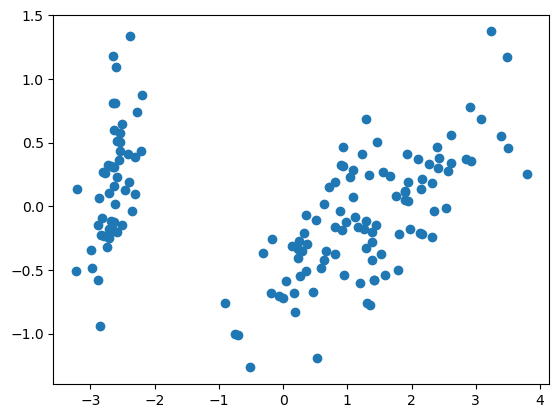

In [14]:
print("Description des données")
print(iris.describe())

print("PCA")
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris)

print("Affichage des données")
plt.scatter(iris_pca[:,0], iris_pca[:,1])
plt.show()

## 2. Centrer et réduire les données

Pour que l'ACP fonctionne correctement, il faut que les données soient centrées et réduites. Pour cela, nous allons utiliser la formule suivante :

$$
X_{cr} = \frac{X - \bar{X}}{\sigma}
$$

Où $\bar{X}$ est la moyenne de $X$ et $\sigma$ est l'écart-type de $X$.

Formule de la moyenne :

$$
\bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i
$$

Formule de l'écart-type :

$$
\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})^2}
$$



In [32]:
# Calcule de la moyenne
print("Moyenne des données")
moyennes =[]
for i in range(0,4):
    print(iris.columns[i], ":", end="")
    sum=0
    for j in range(0,iris.shape[0]):
        sum+=iris.iloc[j,i]
    print(sum/iris.shape[0])
    moyennes.append(sum/iris.shape[0])


Moyenne des données
sepal length (cm) :5.843333333333335
sepal width (cm) :3.057333333333334
petal length (cm) :3.7580000000000027
petal width (cm) :1.199333333333334


In [33]:
# Calcule de l'écart-type
print("Ecart-type des données")
ecart_type = []
for i in range(0,4):
    print(iris.columns[i], ":", end="")
    sum=0
    for j in range(0,iris.shape[0]):
        sum+=(iris.iloc[j,i]-iris.iloc[:,i].mean())**2
    print(np.sqrt(sum/iris.shape[0]))
    ecart_type.append(np.sqrt(sum/iris.shape[0]))

Ecart-type des données
sepal length (cm) :0.8253012917851408
sepal width (cm) :0.4344109677354945
petal length (cm) :1.7594040657753038
petal width (cm) :0.7596926279021593


In [34]:
# Calcule de la covariance
print("Covariance des donnée")
covariance = []
for i in range(0,4):
    for j in range(0,4):
        print(iris.columns[i], "et", iris.columns[j], ":", end="")
        sum=0
        for k in range(0,iris.shape[0]):
            sum+=(iris.iloc[k,i]-moyennes[i])*(iris.iloc[k,j]-moyennes[j])
        print(sum/iris.shape[0])
        covariance.append(sum/iris.shape[0])


Covariance des donnée
sepal length (cm) et sepal length (cm) :0.6811222222222222
sepal length (cm) et sepal width (cm) :-0.04215111111111109
sepal length (cm) et petal length (cm) :1.2658199999999995
sepal length (cm) et petal width (cm) :0.512828888888889
sepal width (cm) et sepal length (cm) :-0.04215111111111109
sepal width (cm) et sepal width (cm) :0.1887128888888887
sepal width (cm) et petal length (cm) :-0.3274586666666668
sepal width (cm) et petal width (cm) :-0.12082844444444452
petal length (cm) et sepal length (cm) :1.2658199999999995
petal length (cm) et sepal width (cm) :-0.3274586666666668
petal length (cm) et petal length (cm) :3.0955026666666674
petal length (cm) et petal width (cm) :1.2869719999999993
petal width (cm) et sepal length (cm) :0.512828888888889
petal width (cm) et sepal width (cm) :-0.12082844444444452
petal width (cm) et petal length (cm) :1.2869719999999993
petal width (cm) et petal width (cm) :0.5771328888888888


## 3. Calculer la matrice de covariance

La matrice de covariance est calculée de la manière suivante :

$$
C = \frac{1}{n}X_{cr}^TX_{cr}
$$

Où $n$ est le nombre d'observations.


In [51]:
# Calcule de la matrice de covariance
print("Matrice de covariance")
matrice_covariance = []
for i in range(0,4):
    matrice_covariance.append(covariance[i*4:i*4+4])
    #covariance[i*4:i*4+4] correspond à la ligne i de la matrice de covariance (4 valeurs) 
matrice_covariance = pd.DataFrame(matrice_covariance)
print(matrice_covariance)

Matrice de covariance
          0         1         2         3
0  0.681122 -0.042151  1.265820  0.512829
1 -0.042151  0.188713 -0.327459 -0.120828
2  1.265820 -0.327459  3.095503  1.286972
3  0.512829 -0.120828  1.286972  0.577133


Voici à quoi ressemble le tableau de covariance :

|   | SepalLengthCm | SepalWidthCm | PetalLengthCm | PetalWidthCm |
|---|---------------|--------------|---------------|--------------|
| SepalLengthCm | 0.685693 | -0.042434 | 1.274315 | 0.516271 |
| SepalWidthCm | -0.042434 | 0.189979 | -0.329656 | -0.121639 |
| PetalLengthCm | 1.274315 | -0.329656 | 3.116278 | 1.295609 |
| PetalWidthCm | 0.516271 | -0.121639 | 1.295609 | 0.581006 |

Donc `covariance[i*4:i*4+4]` indique d'extraire les 4 valeurs de la ligne `i` de la matrice de covariance.

In [36]:
# On vérifie que la matrice de covariance est correcte
print("Vérification de la matrice de covariance")
print(iris.cov())

Vérification de la matrice de covariance
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           0.685694         -0.042434           1.274315   
sepal width (cm)           -0.042434          0.189979          -0.329656   
petal length (cm)           1.274315         -0.329656           3.116278   
petal width (cm)            0.516271         -0.121639           1.295609   

                   petal width (cm)  
sepal length (cm)          0.516271  
sepal width (cm)          -0.121639  
petal length (cm)          1.295609  
petal width (cm)           0.581006  


On peut aussi vérifier que notre résultat est correct si la matrice est symétrique.

## 4. Calculer les valeurs propres et vecteurs propres

Nous allons utiliser la méthode `eig` de `numpy` pour calculer les valeurs propres et vecteurs propres de la matrice de covariance : detrminer les valeurs propres et vecteurs propres d'une matrice est un problème d'algèbre linéaire que nous n'allons pas détailler ici.

In [54]:
# Calcule des valeurs propres et vecteurs propres
print("Valeurs propres et vecteurs propres")
valeurs_propres, vecteurs_propres = np.linalg.eig(matrice_covariance)
print("Valeurs propres")
print(valeurs_propres)
print("Vecteurs propres")
print(vecteurs_propres)

Valeurs propres et vecteurs propres
Valeurs propres
[0.68112222 0.18871289 3.09550267 0.57713289]
Vecteurs propres
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


On doit maintennat trier les valeurs propres et vecteurs propres par ordre décroissant des valeurs propres.

In [76]:
# On crée un dictionnaire avec les valeurs propres et les vecteurs propres4
sum=0 # Somme des valeurs propres
dict = {}
for i in range(0,4):
    sum+=valeurs_propres[i]
    dict[valeurs_propres[i]] = vecteurs_propres[i]
print(dict)

# On trie le dictionnaire par ordre décroissant des valeurs propres
dict_trie = sorted(dict.items(), key=lambda t: t[0], reverse=True)

print(dict_trie)


{0.6811222222222222: array([1., 0., 0., 0.]), 0.1887128888888887: array([0., 1., 0., 0.]), 3.0955026666666674: array([0., 0., 1., 0.]), 0.5771328888888888: array([0., 0., 0., 1.])}
[(3.0955026666666674, array([0., 0., 1., 0.])), (0.6811222222222222, array([1., 0., 0., 0.])), (0.5771328888888888, array([0., 0., 0., 1.])), (0.1887128888888887, array([0., 1., 0., 0.]))]


In [66]:
# On calcule la variance expliquée
print("Variance expliquée")
variance_expliquee = []
for i in range(0,4):
    variance_expliquee.append(dict_trie[i][0]/sum*100)
    print("Composante", i+1, ":", variance_expliquee[i], "%")

Variance expliquée
Composante 1 : 68.14579319976531 %
Composante 2 : 14.994532099467358 %
Composante 3 : 12.705263968438516 %
Composante 4 : 4.154410732328825 %


On va garder ainsi les 2 vecteurs propres les plus importants.

In [67]:
composante_1 = dict_trie[0][1]
composante_2 = dict_trie[1][1]

print("Composante 1")
print(composante_1)
print("Composante 2")
print(composante_2)

Composante 1
[0. 0. 1. 0.]
Composante 2
[1. 0. 0. 0.]


## 5. Projection des données sur les composantes principales 

Pour projeter les données sur les composantes principales, nous allons utiliser la formule suivante :

$$
X_{pca} = X_{cr}V
$$

Où $V$ est la matrice des vecteurs propres.


In [73]:
# Projection des données sur les vecteurs propres
print("Projection des données sur les vecteurs propres")
composantes = np.array([composante_1, composante_2])
iris_pca = np.dot(iris, composantes.T)
print(iris_pca)

Projection des données sur les vecteurs propres
[[1.4 5.1]
 [1.4 4.9]
 [1.3 4.7]
 [1.5 4.6]
 [1.4 5. ]
 [1.7 5.4]
 [1.4 4.6]
 [1.5 5. ]
 [1.4 4.4]
 [1.5 4.9]
 [1.5 5.4]
 [1.6 4.8]
 [1.4 4.8]
 [1.1 4.3]
 [1.2 5.8]
 [1.5 5.7]
 [1.3 5.4]
 [1.4 5.1]
 [1.7 5.7]
 [1.5 5.1]
 [1.7 5.4]
 [1.5 5.1]
 [1.  4.6]
 [1.7 5.1]
 [1.9 4.8]
 [1.6 5. ]
 [1.6 5. ]
 [1.5 5.2]
 [1.4 5.2]
 [1.6 4.7]
 [1.6 4.8]
 [1.5 5.4]
 [1.5 5.2]
 [1.4 5.5]
 [1.5 4.9]
 [1.2 5. ]
 [1.3 5.5]
 [1.4 4.9]
 [1.3 4.4]
 [1.5 5.1]
 [1.3 5. ]
 [1.3 4.5]
 [1.3 4.4]
 [1.6 5. ]
 [1.9 5.1]
 [1.4 4.8]
 [1.6 5.1]
 [1.4 4.6]
 [1.5 5.3]
 [1.4 5. ]
 [4.7 7. ]
 [4.5 6.4]
 [4.9 6.9]
 [4.  5.5]
 [4.6 6.5]
 [4.5 5.7]
 [4.7 6.3]
 [3.3 4.9]
 [4.6 6.6]
 [3.9 5.2]
 [3.5 5. ]
 [4.2 5.9]
 [4.  6. ]
 [4.7 6.1]
 [3.6 5.6]
 [4.4 6.7]
 [4.5 5.6]
 [4.1 5.8]
 [4.5 6.2]
 [3.9 5.6]
 [4.8 5.9]
 [4.  6.1]
 [4.9 6.3]
 [4.7 6.1]
 [4.3 6.4]
 [4.4 6.6]
 [4.8 6.8]
 [5.  6.7]
 [4.5 6. ]
 [3.5 5.7]
 [3.8 5.5]
 [3.7 5.5]
 [3.9 5.8]
 [5.1 6. ]
 [4.5 5.4]
 [4.5 6. ]
 [4.7 

Affichage des données


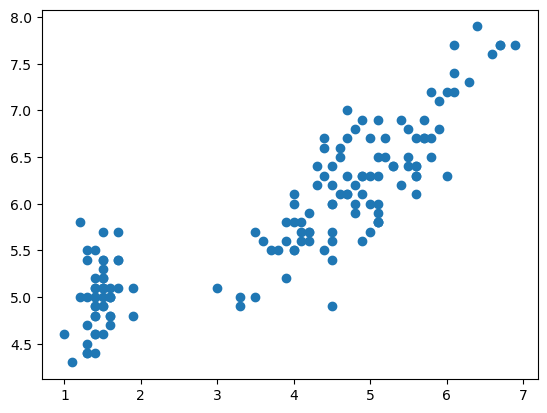

In [74]:
# Affichage des données
print("Affichage des données")
plt.scatter(iris_pca[:,0], iris_pca[:,1])
plt.show()

> **Note** :
> Le graphique ci-dessous est un peu différent de celui de `sklearn` car nous n'avons pas calculé les composantes principales dans le même ordre.